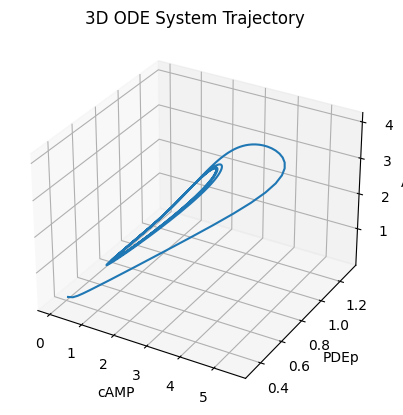

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# Define the system of ODEs
def ode_system(variables, t, params):
    cAMP, PDEp, ACp = variables
    k0, k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, ACt, PDEt = params

    dPDEp = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dACp = r1 * cAMP * ((ACt - ACp) / Km1) - r2 * Dt * ACp / (Km2 + ACp)
    dcAMP = k0 + k1 * ACp - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp, dACp]

# Define the parameter values
params = (0.0, 4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64)

# Define the initial conditions
initial_conditions = [0.33, 0.33, 0.33]

# Define the time points for the integration
t = np.linspace(-100, 100, 1000)

# Solve the system of ODEs using odeint
solution = odeint(ode_system, initial_conditions, t, args=(params,))

# Extract the individual variables from the solution
cAMP, PDEp, ACp = solution[:, 0], solution[:, 1], solution[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of the system
ax.plot(cAMP, PDEp, ACp)

# Set plot properties
ax.set_xlabel('cAMP')
ax.set_ylabel('PDEp')
ax.set_zlabel('ACp')
ax.set_title('3D ODE System Trajectory')

plt.show()
